![dvd_image](dvd_image.jpg)

A DVD rental company needs your help! They want to figure out how many days a customer will rent a DVD for based on some features and has approached you for help. They want you to try out some regression models which will help predict the number of days a customer will rent a DVD for. The company wants a model which yeilds a MSE of 3 or less on a test set. The model you make will help the company become more efficient inventory planning.

The data they provided is in the csv file `rental_info.csv`. It has the following features:
- `"rental_date"`: The date (and time) the customer rents the DVD.
- `"return_date"`: The date (and time) the customer returns the DVD.
- `"amount"`: The amount paid by the customer for renting the DVD.
- `"amount_2"`: The square of `"amount"`.
- `"rental_rate"`: The rate at which the DVD is rented for.
- `"rental_rate_2"`: The square of `"rental_rate"`.
- `"release_year"`: The year the movie being rented was released.
- `"length"`: Lenght of the movie being rented, in minuites.
- `"length_2"`: The square of `"length"`.
- `"replacement_cost"`: The amount it will cost the company to replace the DVD.
- `"special_features"`: Any special features, for example trailers/deleted scenes that the DVD also has.
- `"NC-17"`, `"PG"`, `"PG-13"`, `"R"`: These columns are dummy variables of the rating of the movie. It takes the value 1 if the move is rated as the column name and 0 otherwise. For your convinience, the reference dummy has already been dropped.

In [54]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import any additional modules and start coding below

rental = pd.read_csv('rental_info.csv')
rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401


In [55]:
rental['rental_date'] = pd.to_datetime(rental['rental_date'])
rental['return_date'] = pd.to_datetime(rental['return_date'])
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15861 entries, 0 to 15860
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   rental_date       15861 non-null  datetime64[ns, UTC]
 1   return_date       15861 non-null  datetime64[ns, UTC]
 2   amount            15861 non-null  float64            
 3   release_year      15861 non-null  float64            
 4   rental_rate       15861 non-null  float64            
 5   length            15861 non-null  float64            
 6   replacement_cost  15861 non-null  float64            
 7   special_features  15861 non-null  object             
 8   NC-17             15861 non-null  int64              
 9   PG                15861 non-null  int64              
 10  PG-13             15861 non-null  int64              
 11  R                 15861 non-null  int64              
 12  amount_2          15861 non-null  float64            
 13  l

In [56]:
rental['rental_length'] = rental['return_date'] - rental['rental_date']
rental['rental_length_days'] = rental['rental_length'].dt.days
rental.describe()

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days
count,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861.000000,15861,15861.000000
mean,4.217161,2006.885379,2.944101,114.994578,20.224727,0.204842,0.200303,0.223378,0.198726,23.355504,14832.841876,11.389287,5 days 00:36:28.541706071,4.525944
std,2.360383,2.025027,1.649766,40.114715,6.083784,0.403599,0.400239,0.416523,0.399054,23.503164,9393.431996,10.005293,2 days 14:12:21.733112388,2.635108
min,0.990000,2004.000000,0.990000,46.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.980100,2116.000000,0.980100,0 days 18:00:00,0.000000
25%,2.990000,2005.000000,0.990000,81.000000,14.990000,0.000000,0.000000,0.000000,0.000000,8.940100,6561.000000,0.980100,2 days 20:52:00,2.000000
50%,3.990000,2007.000000,2.990000,114.000000,20.990000,0.000000,0.000000,0.000000,0.000000,15.920100,12996.000000,8.940100,5 days 00:34:00,5.000000
75%,4.990000,2009.000000,4.990000,148.000000,25.990000,0.000000,0.000000,0.000000,0.000000,24.900100,21904.000000,24.900100,7 days 03:29:00,7.000000
max,11.990000,2010.000000,4.990000,185.000000,29.990000,1.000000,1.000000,1.000000,1.000000,143.760100,34225.000000,24.900100,9 days 05:59:00,9.000000


In [57]:
rental['special_features'].unique()

array(['{Trailers,"Behind the Scenes"}', '{Trailers}',
       '{Commentaries,"Behind the Scenes"}', '{Trailers,Commentaries}',
       '{"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes","Behind the Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes"}',
       '{"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes","Behind the Scenes"}',
       '{Commentaries,"Deleted Scenes"}', '{Commentaries}',
       '{Trailers,Commentaries,"Behind the Scenes"}',
       '{Trailers,"Deleted Scenes"}', '{"Deleted Scenes"}',
       '{Trailers,Commentaries,"Deleted Scenes","Behind the Scenes"}'],
      dtype=object)

In [58]:
rental['deleted_scenes'] = np.where(rental['special_features'].str.contains("Deleted Scenes"), 1, 0)
rental['behind_the_scenes'] = np.where(rental['special_features'].str.contains("Behind the Scenes"), 1, 0)
rental['deleted_scenes'].value_counts()
rental['behind_the_scenes'].value_counts()

1    8507
0    7354
Name: behind_the_scenes, dtype: int64

In [59]:
rental.head()

,rental_date,return_date,amount,release_year,rental_rate,length,replacement_cost,special_features,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,rental_length,rental_length_days,deleted_scenes,behind_the_scenes
0,2005-05-25 02:54:33+00:00,2005-05-28 23:40:33+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,3 days 20:46:00,3,0,1
1,2005-06-15 23:19:16+00:00,2005-06-18 19:24:16+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 20:05:00,2,0,1
2,2005-07-10 04:27:45+00:00,2005-07-17 10:11:45+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,7 days 05:44:00,7,0,1
3,2005-07-31 12:06:41+00:00,2005-08-02 14:30:41+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,2 days 02:24:00,2,0,1
4,2005-08-19 12:30:04+00:00,2005-08-23 13:35:04+00:00,2.99,2005.0,2.99,126.0,16.99,"{Trailers,""Behind the Scenes""}",0,0,0,1,8.9401,15876.0,8.9401,4 days 01:05:00,4,0,1


In [60]:
X = rental.drop(['rental_length_days', 'rental_date', 'return_date', 'special_features', 'rental_length'], axis=1)
y = rental['rental_length_days']
#y = rental['length']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_test

,amount,release_year,rental_rate,length,replacement_cost,NC-17,PG,PG-13,R,amount_2,length_2,rental_rate_2,deleted_scenes,behind_the_scenes
15067,4.99,2005.0,0.99,184.0,9.99,0,0,1,0,24.9001,33856.0,0.9801,1,1
3808,4.99,2005.0,4.99,179.0,29.99,0,0,0,1,24.9001,32041.0,24.9001,0,1
1015,4.99,2007.0,4.99,73.0,17.99,0,1,0,0,24.9001,5329.0,24.9001,1,1
12617,4.99,2009.0,0.99,172.0,14.99,0,0,0,1,24.9001,29584.0,0.9801,0,1
1711,4.99,2007.0,4.99,91.0,16.99,0,0,1,0,24.9001,8281.0,24.9001,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,2.99,2004.0,0.99,129.0,15.99,0,1,0,0,8.9401,16641.0,0.9801,0,1
8917,9.99,2010.0,4.99,134.0,17.99,0,0,1,0,99.8001,17956.0,24.9001,1,1
13592,0.99,2004.0,0.99,134.0,20.99,0,0,0,1,0.9801,17956.0,0.9801,1,1
7739,2.99,2006.0,2.99,141.0,21.99,0,0,1,0,8.9401,19881.0,8.9401,0,0


In [63]:
columns = X.columns
print(X_train_scaled[:5])  

[[-0.52115626  1.53806025  0.02498507 -0.62499339  0.9457733   1.97024812
  -0.50386391 -0.5343329  -0.50091113 -0.61340103 -0.71877936 -0.24802528
  -0.99152394  0.93126545]
 [ 0.32713504  0.55238414 -1.18497897 -1.54954058  0.9457733   1.97024812
  -0.50386391 -0.5343329  -0.50091113  0.06568983 -1.28392707 -1.04188023
   1.00854852 -1.07380769]
 [ 1.17542634  0.05954609  1.23494911  1.39901531  0.9457733  -0.50755029
  -0.50386391  1.87149246 -0.50091113  1.08517711  1.53935479  1.34367384
  -0.99152394  0.93126545]
 [-0.52115626  1.53806025  0.02498507 -1.04978535  1.60437058 -0.50755029
  -0.50386391 -0.5343329   1.99636211 -0.61340103 -1.01475824 -0.24802528
   1.00854852  0.93126545]
 [ 0.75128069 -1.41896808 -1.18497897  0.17461498 -0.86536921  1.97024812
  -0.50386391 -0.5343329  -0.50091113  0.53288392  0.0058402  -1.04188023
   1.00854852 -1.07380769]]


In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([ 1.09450574e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.04371607e-03,  3.11152608e-06, -1.76161058e-01,
       -0.00000000e+00,  0.00000000e+00])

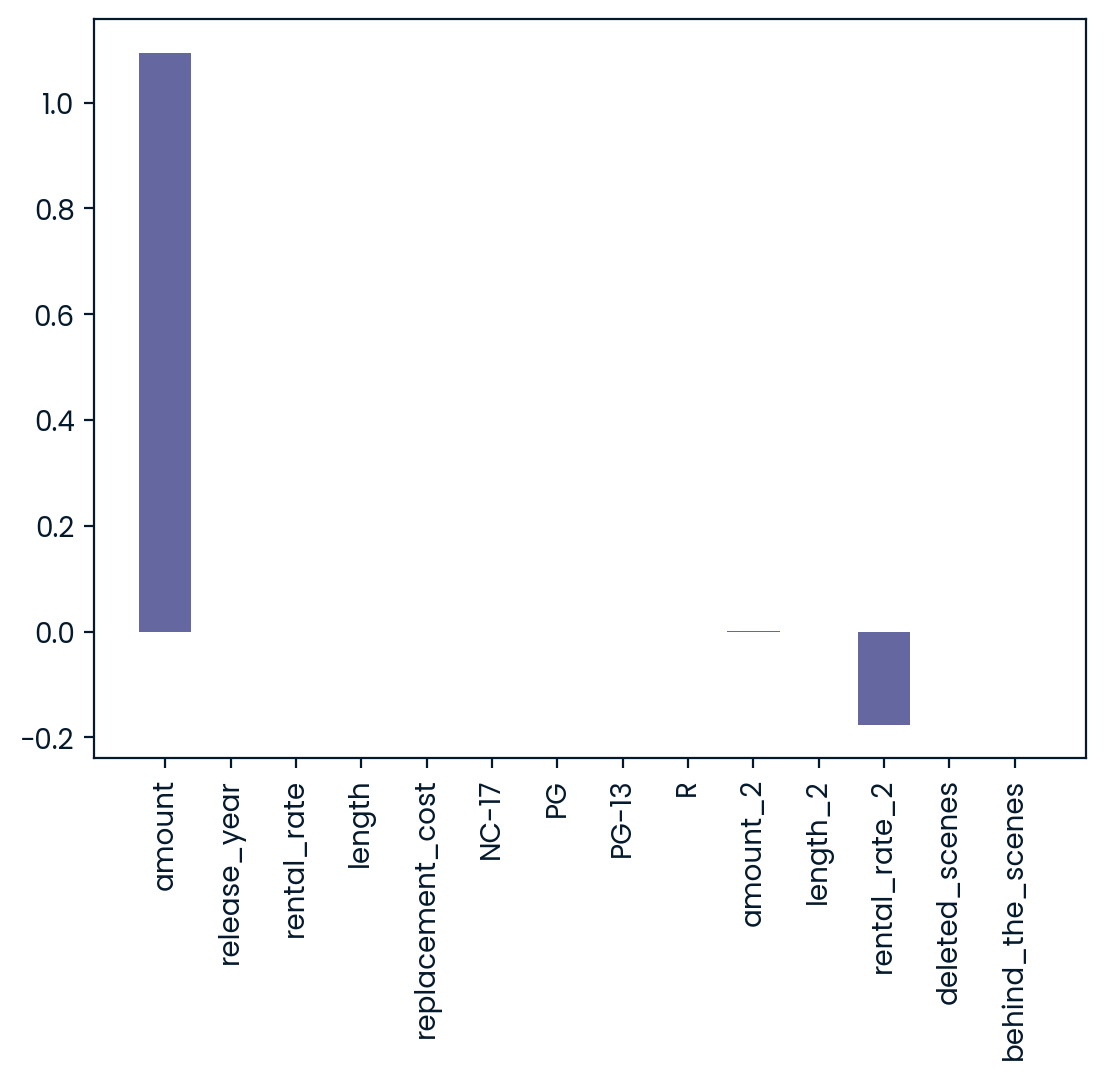

In [65]:
import matplotlib.pyplot as plt
plt.bar(columns, lasso_coef)
plt.xticks(rotation=90)
plt.show()

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

lr = LogisticRegression(random_state=9)
dt = DecisionTreeRegressor(random_state=9)
rf = RandomForestRegressor(random_state=9)
regressor = [('Logistic Regression', lr), ('Decision Tree', dt), ('Random Forest', rf)]

In [67]:
for reg_name, reg in regressor:
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    print(reg_name, ":", mean_squared_error(y_test, y_pred, squared=False))

Logistic Regression : 1.910212737082957
Decision Tree : 1.472195129237155
Random Forest : 1.4249644005513116


In [68]:
from sklearn.model_selection import RandomizedSearchCV
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}

In [74]:
param_grid  = {'n_estimators': [300, 400, 500], 'max_depth': [2, 4, 6], 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8, 1]}
rf_cv = RandomizedSearchCV(rf, param_distributions=param_grid, cv=10, n_jobs=-1)
rf_cv.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=9),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6],
                                        'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                                        'min_samples_leaf': [0.04, 0.06, 0.08],
                                        'n_estimators': [300, 400, 500]})

In [75]:
best_rf_cv_params = rf_cv.best_params_
print('Best hyperparameters: \n', best_rf_cv_params)

Best hyperparameters: 
 {'n_estimators': 300, 'min_samples_leaf': 0.06, 'max_features': 0.8, 'max_depth': 6}


In [76]:
best_model = rf_cv.best_estimator_
test_acc = best_model.score(X_test_scaled, y_test)
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Test set accuracy of best model: 0.583


In [77]:
from sklearn.metrics import mean_squared_error
y_pred = rf_cv.predict(X_test_scaled)
best_mse = mean_squared_error(y_test, y_pred, squared=False)
print(best_mse)

1.7202777322019418
